# FMCA interface

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [2]:
dim = 2
N = 42000
dtilde = 3
mp_deg = 4
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.H2SampletTree(pts, dtilde, mp_deg)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
pts = pts[:, ST.indices()]

elapsed time samplet tree construction:  0.12913203239440918 sec.
------------------- Cluster tree metrics -------------------
dimension:                2
number of points:         42000
cluster splitting method: CardinalityBisection
bounding box diameter:    11.6708
number of clusters:       4095
fill distance:            0.804146
separation radius:        5.17976e-05
min cluster discrepancy:  9.52e-08
max cluster discrepancy:  1.11e-01
mean cluster discrepancy: 2.12e-03
pt. mindist distribution: 
 2.78e-06|****************************************
 8.33e-06|*
 1.39e-05|*
 1.94e-05|*
 2.50e-05|*
 3.05e-05|*
 3.61e-05|*
 4.16e-05|*
 4.72e-05|*
 5.28e-05|*
 5.83e-05|
 6.39e-05|
 6.94e-05|
 7.50e-05|
 8.05e-05|
discrepancy distribution: 
 1.52e-07|*
 3.85e-07|
 9.77e-07|
 2.48e-06|*
 6.29e-06|*
 1.60e-05|*
 4.05e-05|*
 1.03e-04|***
 2.61e-04|**********************
 6.63e-04|****************************************
 1.68e-03|***********
 4.27e-03|*******
 1.08e-02|****
 2.75e-02|*
 6.98e-0

### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [3]:
start = time.time()
data = 2 * np.array(np.random.rand(N,1000), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  0.8660399913787842 sec.
relative error:  5.179796019147352e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

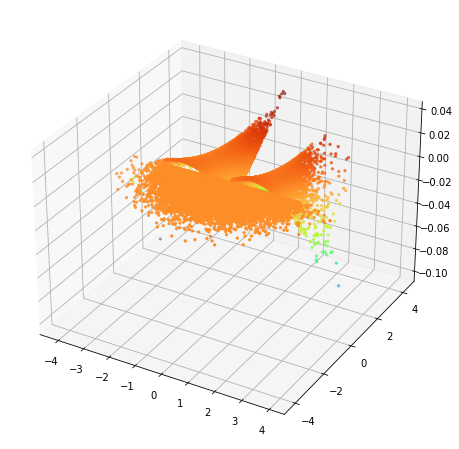

In [4]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(pts[0,:], pts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()

In [5]:
cov = FMCA.CovarianceKernel("exponential", 2)
K = FMCA.sampletCompressKernel(cov, ST, pts, 0.8, 1e-2)

3 4  8.00e-01 1.00e-02
trips reserved
created retval


In [6]:
print(K)

None
